In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Preliminary Analysis

## ------------ Questions ------------

## percentage answered per year

In [2]:
all_ques = pd.read_csv('user data/stackoverflow_questions_2016-2019_notext.csv', \
                       usecols=['Id', 'creation_date', 'answer_count', 'score', 'owner_user_id'])

In [5]:
all_ques['year'] = all_ques.creation_date.map(lambda date: date[:4])

In [14]:
answered_by_year = all_ques.loc[all_ques.answer_count > 0, ['year', 'Id']].groupby('year').agg('count')
answered_by_year.rename(columns={'Id': '# of answered questions'}, inplace=True)

total = all_ques[['year', 'Id']].groupby('year').agg('count')
answered_by_year['total # of questions'] = total['Id']

answered_by_year['percentage of questions answered'] = answered_by_year['# of answered questions'] / \
                                                       answered_by_year['total # of questions']

In [15]:
answered_by_year

# of answered questions  total # of questions  \
year                                                  
2016                  1877857               2215666   
2017                  1770846               2132515   
2018                  1550862               2008571   
2019                   958170               1440718   

      percentage of questions answered  
year                                    
2016                          0.847536  
2017                          0.830403  
2018                          0.772122  
2019                          0.665064

We can see that every year there are around 15-20% of question that unfortunately does not receive any answers.

## average number of answers to each question per year (excluding questions with 0 answers)

In [17]:
all_ques.loc[all_ques.answer_count > 0, ['year', 'answer_count']].groupby('year').agg('mean')

answer_count
year              
2016      1.559646
2017      1.514556
2018      1.464687
2019      1.429812

We can observe that on average, each question just received not more than 1 answers, which is logical, considering the second or third answers to the question will not add much value if the first respond already solve the problem.

## correlation between answer count and the score of the questions

We hypothesise there is a linear relationship between the score and the number of answer the question received. It is likely that the more answer received by the questions, meaning it is more popular among viewers, thus it is easier to obtain a high question score.

In [20]:
all_ques.loc[all_ques.answer_count > 0, 'answer_count'].corr(all_ques.loc[all_ques.answer_count > 0, 'score'], \
                                                             method='pearson')

0.24907185610817517

However, to our surprise, more answers does not mean a higher question score. Is seems like the content could be one more of the most important factor affecting the score.

## average score per year

In [25]:
all_ques.loc[all_ques.answer_count > 0, ['year', 'score']].groupby('year').agg('mean')

score
year          
2016  1.166489
2017  0.849374
2018  0.587082
2019  0.385801

## ------------ Answers ------------

In [3]:
all_ans = pd.read_csv('user data/stackoverflow_answers_2016-2019_notext.csv', \
                      usecols=['Id', 'creation_date', 'score', 'owner_user_id'])

## Answer per year

In [28]:
all_ans['year'] = all_ans['creation_date'].map(lambda date: date[:4])
all_ans[['year', 'Id']].groupby('year').agg('count').rename(columns={'Id': '# of answers'})

# of answers
year              
2016       3088821
2017       2924981
2018       2577812
2019       1646541

## average score of answers in each year

In [29]:
all_ans[['year', 'score']].groupby('year').agg('mean').rename(columns={'score': 'average score'})

average score
year               
2016       1.881716
2017       1.525719
2018       1.167837
2019       0.787757

On average, answers receive higher score than questions. A reasonable explanation would be people browsing stackoverflow is more interested in finding the solution for a problem, rathering than evaluating the questions. Therefore, they are likey to rate the answers than giving a score to the questions.

## ------------ Questions & Answers ------------

In [4]:
display(all_ques.head(3))
display(all_ans.head(3))

Id  answer_count               creation_date  owner_user_id  score
0  34553230             1  2016-01-01 03:06:31.22 UTC       401226.0      0
1  34558566             1   2016-01-01 17:56:58.5 UTC      2702781.0      1
2  34577016             1  2016-01-03 13:26:04.52 UTC      4675736.0      0

Id                creation_date  owner_user_id  score
0  56292528  2019-05-24 12:16:17.087 UTC      5674777.0      2
1  56292773   2019-05-24 12:31:26.12 UTC      8245406.0      2
2  56292786  2019-05-24 12:32:31.437 UTC      8199990.0      2

In [9]:
all_ques_per_user = all_ques[['owner_user_id', 'Id']].groupby('owner_user_id').agg('count')
all_ques_per_user.rename(columns={'Id': '# of questions'}, inplace=True)

all_ans_per_user = all_ans[['owner_user_id', 'Id']].groupby('owner_user_id').agg('count')
all_ans_per_user.rename(columns={'Id': '# of answers'}, inplace=True)

In [11]:
print('Number of users who had asked a question during 2016-2019:', all_ques_per_user.shape[0])
print('Number of users who had answered a question during 2016-2019:', all_ans_per_user.shape[0])

Number of users who had asked a question during 2016-2019: 2126958
Number of users who had answered a question during 2016-2019: 1319455


In [12]:
all_ques_ans_user = all_ques_per_user.join(all_ans_per_user, how='inner')
print('Number of users who had asked and answered a question during 2016-2019:', all_ques_ans_user.shape[0])

Number of users who had asked and answered a question during 2016-2019: 756259


Only ~35% of the user who asked a question also gives an answer to another question. (as those who ask questions are more likely to be less experience, thus they cannot give an answer to another question.)
Slightly over half (57%) who answered a question raised another question on SO. It is pretty strange as we thought those who answer a question in SO are more active and are more likely to raise questions. Seems like it may not be the case.

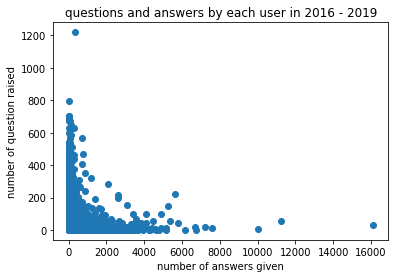

In [15]:
plt.scatter(all_ques_ans_user['# of answers'], all_ques_ans_user['# of questions'])
plt.title('questions and answers by each user in 2016 - 2019')
plt.xlabel('number of answers given')
plt.ylabel('number of question raised')
plt.show()

We observe an interesting cluster build up upon the lower participation area. It is likely that most users on stackoverflow are casual users. They only ask a few questions and occasionally answered a few questions. 

The negative relationship between # of question raised and # of answer given could possibly reflect the influence of experience. More experienced coder may give more answers but seldom raise questions, while less experienced programmer did the opposite. It doesn't seem like a person would raise a lot of questions and give a lot of answers at the same time from the observation.

# Analysis combined with user

In [2]:
# loading the two data pkl answer_with_location and question_with_location
ans = pd.read_pickle('./answer_with_location.pkl')
ques = pd.read_pickle('./question_with_location.pkl')
users = pd.read_pickle('./user_without_null_country.pkl')

In [3]:
ans.head()

user_id  user_reputation country_iso3  answer_id  comment_count  \
0  7573797                1          IRN   44882800              0   
1  7573797                1          IRN   45163140              0   
2  4796241                1          FIN   57655419              0   
3  4890609                1          BRA   44705364              0   
4  5949782                1          IND   56304645              0   

                 creation_date  answer_score  question_id  
0  2017-07-03 10:03:45.947 UTC             0      9783740  
1  2017-07-18 09:47:13.027 UTC             0     24985627  
2   2019-08-26 09:42:51.17 UTC             0     56212126  
3  2017-06-22 16:57:13.167 UTC             0     44681787  
4  2019-05-25 11:59:57.117 UTC            -1     56304472

We filter out the users that have a valid country field from all users of stackoverflow obtained from Google BigQuery, producing a data set consisting of 2665796 users. In the following analysis, we wll be using this set of users information.

In [10]:
ans_score_per_user = ans[['user_id', 'answer_score']].groupby('user_id').agg('sum')

In [11]:
ans_per_user = ans[['user_id', 'answer_id']].groupby('user_id').agg('count')

In [15]:
avg_score_ans_per_user = ans_per_user.join(ans_score_per_user)

In [16]:
avg_score_ans_per_user['average score'] = avg_score_ans_per_user['answer_score'] / avg_score_ans_per_user['answer_id']

In [20]:
avg_score_ans_per_user.sort_values(by='average score', ascending=False).head(15)

answer_id  answer_score  average score
user_id                                        
698620           1          1949         1949.0
2321452          1          1293         1293.0
1055527          1           743          743.0
3831365          1           615          615.0
3022273          1           463          463.0
3256596          1           457          457.0
4145357          1           413          413.0
2224870          1           410          410.0
6290269          1           403          403.0
3626371          2           730          365.0
33701            1           348          348.0
2602797          1           348          348.0
344547           1           340          340.0
6534229          2           671          335.5
601275           1           321          321.0

## ------------ Answers ------------

In [3]:
ans.head(3)

user_id  user_reputation country_iso3  answer_id  comment_count  \
0  7573797                1          IRN   44882800              0   
1  7573797                1          IRN   45163140              0   
2  4796241                1          FIN   57655419              0   

                 creation_date  answer_score  question_id  
0  2017-07-03 10:03:45.947 UTC             0      9783740  
1  2017-07-18 09:47:13.027 UTC             0     24985627  
2   2019-08-26 09:42:51.17 UTC             0     56212126

## Answers per unique user

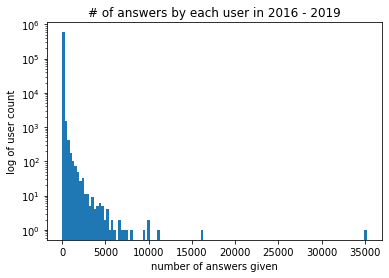

In [4]:
# plotting the number of answers from each unique users
ans_per_user = ans[['user_id', 'answer_id']].groupby('user_id').agg('count').sort_values(by='answer_id', ascending=False)
ans_per_user.rename(columns={'answer_id': '# of answers'}, inplace=True)

plt.hist(ans_per_user['# of answers'], log=True, bins=125)
plt.title('# of answers by each user in 2016 - 2019')
plt.xlabel('number of answers given')
plt.ylabel('log of user count')
plt.show()

We can see the distribution of the users generally follows a power law, as the log of y axis is still an exponential distribtuion. However there are some exception cases in very high answer frequency. Let's take a closer look in the top answers.

In [5]:
ans_per_user.head(6)

# of answers
user_id              
1144035         35219
2901002         16114
1863229         11258
3832970         10041
1491895         10002
1447675          9448

There are one exceptional user who gives 35219 answers in a 4 year period, averaging around 24 answers per day!!. Other top answers also have more than 10000 answers in the 4 years, averaging around 6 to 7 answers per day. 

### can find the user profile separately?

## answers per country

In [6]:
ans_per_country = ans[['country_iso3', 'answer_id']].groupby('country_iso3').agg('count')\
                                                    .sort_values(by='answer_id', ascending=False)
ans_per_country.rename(columns={'answer_id': '# of answers'}, inplace=True)

In [8]:
ans_per_country.head(10)

# of answers
country_iso3              
USA                1471210
IND                1107345
GBR                 483709
DEU                 455678
FRA                 231429
CAN                 203966
AUS                 177981
NLD                 151807
RUS                 140619
POL                 135445

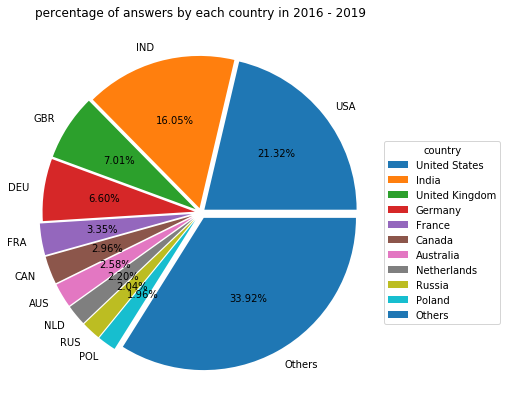

Others refers to the countries other than the top ten most frequent responding countries.


In [9]:
plt.figure(figsize=(30,7))

# create a new dataframe grouping all the small entries
pie_country = ans_per_country.iloc[:10]
others = pd.DataFrame({'# of answers': [ans_per_country.iloc[10:]['# of answers'].sum()], 'country_iso3': ['Others']})
others.set_index('country_iso3', inplace=True)
pie_country = pie_country.append(others)
legend_string = ['United States', 'India', 'United Kingdom', 'Germany', 'France', \
                 'Canada', 'Australia', 'Netherlands', 'Russia', 'Poland', 'Others']
explode = [0.03, 0.03, 0.04, 0.04, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.04]

# plotting the pie chart
wedges, texts, autotexts = plt.pie(pie_country['# of answers'], explode=explode, \
                                   labels=pie_country.index, autopct='%1.2f%%')
plt.title('percentage of answers by each country in 2016 - 2019')
plt.gca().legend(wedges, legend_string, title='country', loc=0, bbox_to_anchor=(1.3, 0.7))
plt.show()
print('Others refers to the countries other than the top ten most frequent responding countries.')

In [10]:
print('The number of countries with users answering at least 1 question in stackoverflow =', ans_per_country.shape[0])

The number of countries with users answering at least 1 question in stackoverflow = 227


We can see that stackoverflow is truly a global community. There are a total of 227 unique countries where users of stackoverflow provides an answer. Although the majority of the answers are still from USA and India (which is kind of expected given the large amount of users in the USA), contributing around 37% of the total answers given, the contribution of small countries combined is also very significant to the community. 

In [11]:
ans_per_country.head(10)

# of answers
country_iso3              
USA                1471210
IND                1107345
GBR                 483709
DEU                 455678
FRA                 231429
CAN                 203966
AUS                 177981
NLD                 151807
RUS                 140619
POL                 135445

## ------------ Questions ------------

In [12]:
ques.head(3)

user_id  user_reputation country_iso3  question_id  answer_count  \
0  7019478                1          SGP     40044740             2   
1  7019478                1          SGP     42085965             0   
2  7019478                1          SGP     51300090             1   

   comment_count       question_creation_date  question_score  view_count  
0              0   2016-10-14 13:44:25.71 UTC              -6         381  
1              2   2017-02-07 09:21:01.72 UTC               0          40  
2              3  2018-07-12 07:50:10.133 UTC               0         439

## questions from individual users

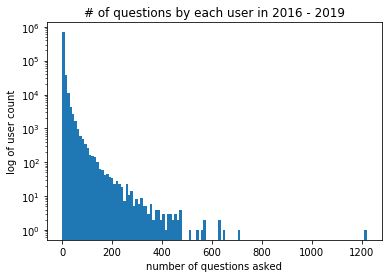

In [16]:
ques_per_user = ques[['user_id', 'question_id']].groupby('user_id').agg('count')\
                                                .sort_values(by='question_id', ascending=False)
ques_per_user.rename(columns={'question_id': '# of questions'}, inplace=True)

plt.hist(ques_per_user['# of questions'], log=True, bins=125)
plt.title('# of questions by each user in 2016 - 2019')
plt.xlabel('number of questions asked')
plt.ylabel('log of user count')
plt.show()

In [21]:
ques_per_user.head(3)

# of questions
user_id                
1223975            1219
258483              703
6703783             646

We can see the numbers asked by the each user also follows a power law as the log of the y is still an exponential distribution. There are people who ask over 1200 questions during the 4 year period, averaging nearly 1 question per day.

## correlation between question asked and answers provided?

In [22]:
ans_per_user.head(3)

# of answers
user_id              
1144035         35219
2901002         16114
1863229         11258

In [23]:
print(ques_per_user.shape[0])
print(ans_per_user.shape[0])

753244
589546


In [28]:
ques_ans_per_user = ans_per_user.join(ques_per_user, how='inner')
print(ques_ans_per_user.shape[0])

366812


Only around half of the people who post a question in the recent 4 years gives an answer to another question and those who had given a answer, around 60% also raise another question.

In [30]:
ques_ans_per_user['# of questions'].corr(ques_ans_per_user['# of answers'])

0.09846601029950336

## questions from each country

In [12]:
ques_per_country = ques[['country_iso3', 'question_id']].groupby('country_iso3').agg('count')\
                                                        .sort_values(by='question_id', ascending=False)
ques_per_country.rename(columns={'question_id': '# of questions'}, inplace=True)

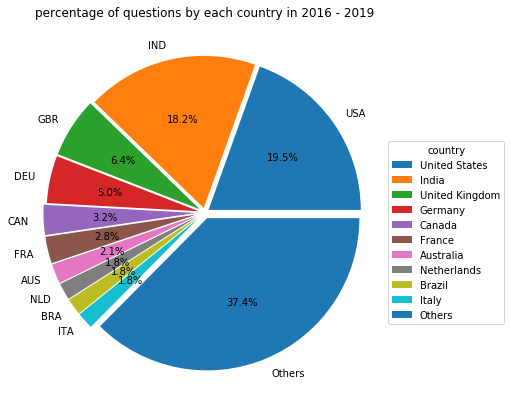

Others refers to the countries other than the top ten most frequent asking countries.


In [13]:
plt.figure(figsize=(30,7))

# create a new dataframe grouping all the small entries
pie_country = ques_per_country.iloc[:10]
others = pd.DataFrame({'# of questions': [ques_per_country.iloc[10:]['# of questions'].sum()], 'country_iso3': ['Others']})
others.set_index('country_iso3', inplace=True)
pie_country = pie_country.append(others)
legend_string = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada',\
                 'France', 'Australia', 'Netherlands', 'Brazil', 'Italy', 'Others']
explode = [0.03, 0.03, 0.04, 0.04, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.04]

# plotting the pie chart
wedges, texts, autotexts = plt.pie(pie_country['# of questions'], explode=explode, \
                                   labels=pie_country.index, autopct='%1.1f%%')
plt.title('percentage of questions by each country in 2016 - 2019')
plt.gca().legend(wedges, legend_string, title='country', loc=0, bbox_to_anchor=(1.3, 0.7))
plt.show()
print('Others refers to the countries other than the top ten most frequent asking countries.')

Here we can see the distribution of countries where people ask questions are more even. USA and India still being at the top of the most active questioner. However, the difference between the two countries are much smaller than that of the answers. This could possibly indicates that India, although being very active and has lots of programmer, is still developing their technical specialists and hence raise more questions than giving answers.

## Information transfer

In [3]:
# find the number of questions in the 4 years which got an answer
ques[ques.question_id.isin(ans.question_id)].shape[0]

2134252

In [4]:
ques.shape[0]

3285128

In [8]:
# 2134252 questions that are posted in this 4 years received at least one answer. This accounts for around 65% (out of 3285128) questions that are in our dataset. in fact, over 30 percent of the questions of the previous years remained unanswered.

But we want to focus on the questions that actually received an answer and displayed how people from different parts of the world interact with stackoverflow. Therefore, we would merge the question and answers dataframe and observe the pattern of knowledge transfer.

In [5]:
ques_and_ans = ques[['question_id', 'country_iso3']].rename(columns={'country_iso3': 'questioner_country'})\
                                                    .merge(ans[['question_id', 'country_iso3']]\
                                                           .rename(columns={'country_iso3': 'answerer_country'}), \
                                                           left_on='question_id', right_on='question_id', how='inner')

In [6]:
ques_ans_grp = ques_and_ans.groupby(['questioner_country', 'answerer_country']).agg('count')\
                           .sort_values('question_id', ascending=False)
ques_ans_grp.head(5)

question_id
questioner_country answerer_country             
USA                USA                    236653
IND                IND                    187438
                   USA                     66928
USA                IND                     49856
GBR                GBR                     45615

In [8]:
import country_converter as coco # to convert the country into iso3 format for better representation

ques_ans_grp.index.rename(['source', 'target'], inplace=True)
ques_ans_grp.rename(columns={'question_id': 'weight'}, inplace=True)
ques_ans_grp = ques_ans_grp.reset_index(level=['source', 'target'])
focused_list = ['USA', 'IND', 'GBR', 'DEU', 'FRA', 'CAN', 'AUS', 'NLD', 'CHE']
ques_ans_grp_filter = ques_ans_grp[(ques_ans_grp.source.isin(focused_list) | ques_ans_grp.target.isin(focused_list))]
# ques_ans_grp_filter = ques_ans_grp_filter[(ques_ans_grp_filter.weight > 3000)]
# ques_ans_grp_filter['source_full'] = coco.convert(names=list(ques_ans_grp_filter.source), to='name_short')
# ques_ans_grp_filter['target_full'] = coco.convert(names=list(ques_ans_grp_filter.target), to='name_short')
# ques_ans_grp_filter.drop(columns=['source', 'target'], inplace=True)
# ques_ans_grp_filter.rename(columns={'source_full': 'source', 'target_full': 'target'}, inplace=True)
# ques_ans_grp_filter

In [9]:
def build_total():
    all_list = []
    for c in focused_list:
        source_to = ques_ans_grp_filter[ques_ans_grp_filter.source == c].nlargest(10, 'weight')
        source_from = ques_ans_grp_filter[(ques_ans_grp_filter.target == c) & ques_ans_grp_filter.source.isin(source_to.target)]
        all_list.append(source_to.append(source_from, ignore_index=True).drop_duplicates())
    dfs = all_list[0]
    for li in all_list[1:]:
        dfs = dfs.append(li, ignore_index=True).drop_duplicates()
    return dfs

info_flow = build_total()
info_flow['source_full'] = coco.convert(names=list(info_flow.source), to='name_short')
info_flow['target_full'] = coco.convert(names=list(info_flow.target), to='name_short')
info_flow.drop(columns=['source', 'target'], inplace=True)
info_flow.rename(columns={'source_full': 'source', 'target_full': 'target'}, inplace=True)
info_flow = info_flow[info_flow.source != info_flow.target]

In [10]:
info_flow.to_json(path_or_buf='./info_flow.json', orient='records', lines=True)

In [5]:
# constructing the varaibles for the sankey diagram
country_list = ['United States', 'India', 'United Kingdom', 'Germany', 'France', 'Canada', \
                'Australia', 'Netherlands', 'Others']
country_list_iso3 = ['USA', 'IND', 'GBR', 'DEU', 'FRA', 'CAN', 'AUS', 'NLD', 'Others']

ques_and_ans_others = ques_and_ans.copy()
ques_and_ans_others['questioner_country'] = ques_and_ans_others['questioner_country']\
                                                .map(lambda c: c if c in country_list_iso3 else 'Others')
ques_and_ans_others['answerer_country'] = ques_and_ans_others['answerer_country']\
                                                .map(lambda c: c if c in country_list_iso3 else 'Others')
ques_ans_grp_others = ques_and_ans_others.groupby(['questioner_country', 'answerer_country'])\
                                         .agg('count').sort_values('question_id', ascending=False)
ques_ans_grp_others = ques_ans_grp_others.reset_index(level=['questioner_country', 'answerer_country'])
# ques_ans_grp_others.head(5)

## Individual flow graph

In [22]:
import math
src = [country_list_iso3.index(c) for c in list(ques_ans_grp_others['questioner_country'])]
tar = [country_list_iso3.index(c) + 9 for c in list(ques_ans_grp_others['answerer_country'])]
val = list(ques_ans_grp_others['question_id'].map(lambda count: math.sqrt(count)))

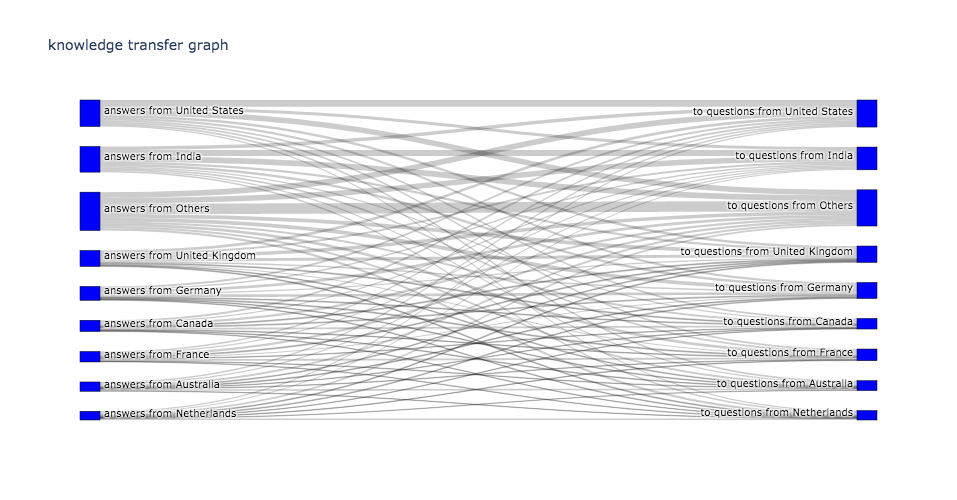

In [23]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      line = dict(color = "black", width = 0.5),
      label = ['answers from '+c for c in country_list] + ['to questions from '+c for c in country_list],
      color = "blue"
    ),
    link = dict(
      source = src,
      target = tar,
      value = val
  ))])

fig.update_layout(title_text='knowledge transfer graph', font_size=10, width=1000, height=500)
fig.show()

## individual flow graph (without others)

In [11]:
ques_ans_grp_noothers = ques_ans_grp_others[(ques_ans_grp_others.questioner_country != 'Others') \
                                            & (ques_ans_grp_others.answerer_country != 'Others')]

In [13]:
src = [country_list_iso3.index(c) for c in list(ques_ans_grp_noothers['questioner_country'])]
tar = [country_list_iso3.index(c) + 9 for c in list(ques_ans_grp_noothers['answerer_country'])]
val = list(ques_ans_grp_noothers['question_id'])

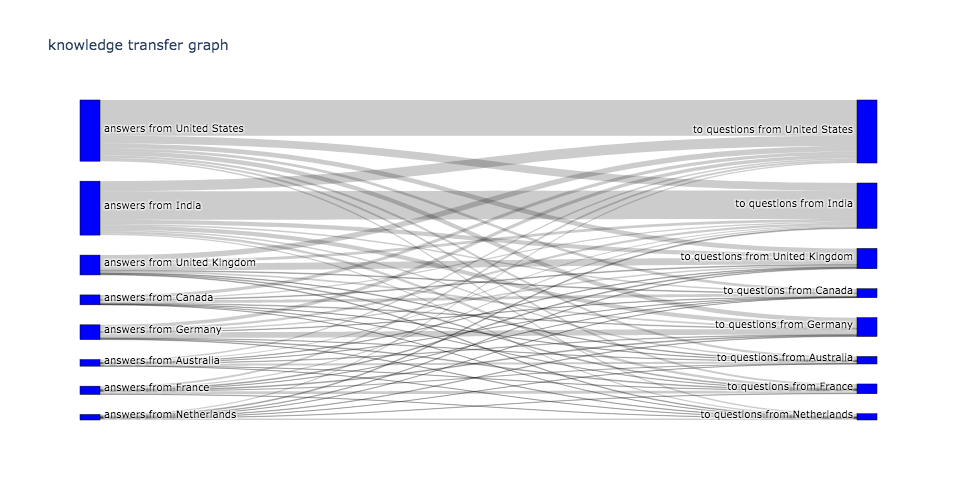

In [14]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      line = dict(color = "black", width = 0.5),
      label = ['answers from '+c for c in country_list] + ['to questions from '+c for c in country_list],
      color = "blue"
    ),
    link = dict(
      source = src,
      target = tar,
      value = val
  ))])

fig.update_layout(title_text='knowledge transfer graph', font_size=10, width=1000, height=500)
fig.show()

## Net flow graph

In [23]:
ques_ans_grp_others = ques_ans_grp_others[ques_ans_grp_others.questioner_country \
                                          != ques_ans_grp_others.answerer_country]

def find_net(pair):
    ques_A_to_B = ques_ans_grp_others[(ques_ans_grp_others.questioner_country == pair[0]) & \
                                      (ques_ans_grp_others.answerer_country == pair[1])].reset_index()\
                                     .iloc[0]['question_id']
    ques_B_to_A = ques_ans_grp_others[(ques_ans_grp_others.questioner_country == pair[1]) & \
                                      (ques_ans_grp_others.answerer_country == pair[0])].reset_index()\
                                     .iloc[0]['question_id']
    if ques_A_to_B > ques_B_to_A:
        return pair[1], pair[0], ques_A_to_B-ques_B_to_A
    else: 
        return pair[0], pair[1], ques_B_to_A-ques_A_to_B
    
def find_net_all(countries):
    result = []
    for i in range(len(countries)):
        for j in range(i+1, len(countries)):
            result.append(find_net((countries[i], countries[j])))
    return result
    
net_transfer = find_net_all(country_list_iso3)

In [24]:
print(net_transfer)

[('USA', 'IND', 17072), ('USA', 'GBR', 4333), ('DEU', 'USA', 6799), ('FRA', 'USA', 1336), ('USA', 'CAN', 3377), ('AUS', 'USA', 3948), ('NLD', 'USA', 623), ('USA', 'Others', 25670), ('GBR', 'IND', 10150), ('DEU', 'IND', 15257), ('FRA', 'IND', 7076), ('CAN', 'IND', 554), ('AUS', 'IND', 1975), ('NLD', 'IND', 4011), ('Others', 'IND', 15872), ('DEU', 'GBR', 1707), ('FRA', 'GBR', 483), ('GBR', 'CAN', 251), ('AUS', 'GBR', 316), ('NLD', 'GBR', 314), ('GBR', 'Others', 12867), ('DEU', 'FRA', 241), ('DEU', 'CAN', 1538), ('DEU', 'AUS', 773), ('DEU', 'NLD', 573), ('DEU', 'Others', 24567), ('FRA', 'CAN', 596), ('FRA', 'AUS', 335), ('FRA', 'NLD', 237), ('FRA', 'Others', 10920), ('AUS', 'CAN', 1023), ('NLD', 'CAN', 344), ('Others', 'CAN', 846), ('NLD', 'AUS', 150), ('AUS', 'Others', 4524), ('NLD', 'Others', 6795)]


In [28]:
src = [country_list_iso3.index(c) for c in list(map(lambda t: t[0], net_transfer))]
tar = [country_list_iso3.index(c) + 9 for c in list(map(lambda t: t[1], net_transfer))]
val = list(map(lambda t: t[2], net_transfer))

We only keep the countries that exist in the list of top ten most active questioner and answerer to keep the graph simple and displayable. This can hopefully gives us more insights on the interaction of these countries and the rest of the world (as others). In the following sankey graph, the net number of answers to the questions from other country.


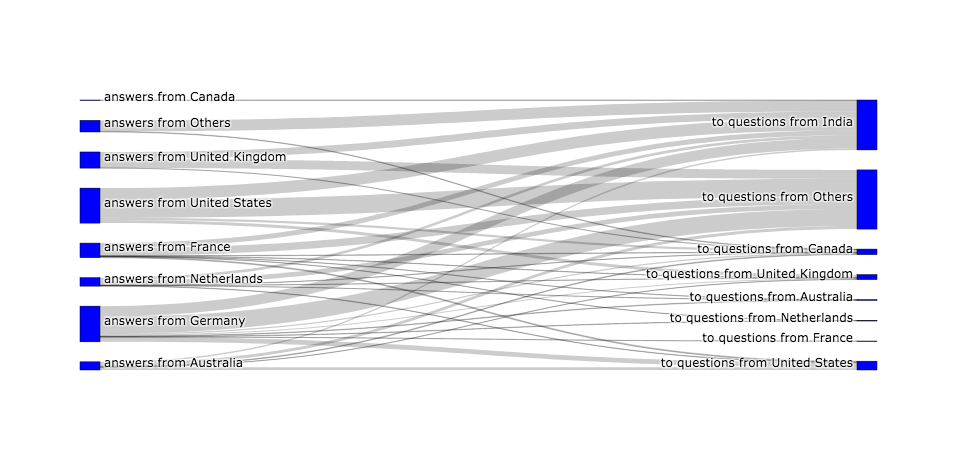

In [30]:
# constructing the variables for the sankey diagram 
print('We only keep the countries that exist in the list of top ten most active questioner and ' + \
      'answerer to keep the graph simple and displayable. This can hopefully gives us more '     + \
      'insights on the interaction of these countries and the rest of the world (as others). In '+ \
      'the following sankey graph, the net number of answers to the questions from other country.')

fig = go.Figure(data=[go.Sankey(
    node = dict(
      line = dict(color = "black", width = 0.5),
      label = ['answers from '+c for c in country_list] + ['to questions from '+c for c in country_list],
      color = "blue"
    ),
    link = dict(
      source = src,
      target = tar,
      value = val
  ))])

fig.update_layout(title_text='knowledge transfer graph', font_size=10)
fig.show()